In [1]:
import numpy as np
import theano
import theano.tensor as T
import os, pickle, gzip
from PIL import Image
import matplotlib.pyplot as plt

from theano import function
rng = np.random

In [2]:
f = gzip.open('mnist.pkl.gz', 'rb')
train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
f.close()

In [3]:
class SimpleTwoLayer(object):
    
    n_in = 2
    n_hidden = 10000
        
    a = theano.shared(
        value=np.random.choice(
            [-1, 1],
            (n_hidden,),
        ).astype(theano.config.floatX),
        name='a',
        borrow=True
    )

    def __init__(self, input):

        self.W = theano.shared(
            value=np.random.randn(
                self.n_in, self.n_hidden
            ).astype(theano.config.floatX),
            name='W',
            borrow=True
        )

        self.y_pred = T.dot(T.nnet.relu(T.dot(input, self.W)), self.a) / np.sqrt(self.n_hidden)
        self.params = [self.W, self.a]
        self.input = input
        
    def cost(self, y):
        return T.sum((self.y_pred - y)**2)

def train(sample_x, sample_y, learning_rate=0.0001, n_epoches=1000):
    
    x = T.matrix('x')
    y = T.vector('y')
    model = SimpleTwoLayer(input=x)
    cost = model.cost(y)
    g_W = T.grad(cost=cost, wrt=model.W)
    updates = [(model.W, model.W - g_W * learning_rate)]
    train_model = theano.function(
        inputs=[x, y],
        outputs=cost,
        updates=updates
    )

    epoch = 0
    while epoch < n_epoches:
        epoch = epoch + 1
        c = train_model(sample_x, sample_y)
#         print(epoch, c)
    return model

In [4]:
def generate_sample(N):
    x = np.random.randn(N,2)
    y = np.zeros((N,))
    for i in range(N):
        y[i] = a_func(x[i,0], x[i,1])
    return x, y

In [5]:
x, y = generate_sample(200)
model = train(x, y)
predict = theano.function(
    inputs=[model.input],
    outputs=model.y_pred
    )
predict([[0.5, 0.5]])

NameError: name 'a_func' is not defined

In [140]:
x, y= generate_sample(200)

models = []
n_model = 50
for i in range(n_model):
    models.append(train(x.astype(np.float64), y.astype(np.float64), n_epoches=1000))

In [141]:
predict = theano.function(
    inputs=[models[3].input],
    outputs=models[3].y_pred
    )
predict([[0.5, 0]])

array([0.50845926])

In [132]:
def predict(model, test_x):
    predict_model = theano.function(
        inputs=[model.input],
        outputs=model.y_pred
    )

    predicted_values = predict_model(test_x)
    return predicted_values


In [133]:
test_x, test_y = generate_sample(1000)

predicted_y = predict(models[0], test_x)
errors = np.zeros((len(models), len(test_x)))
for i in range(len(models)):
    predicted_y = predict(models[i], test_x)
    errors[i] = predicted_y - test_y

In [134]:
Corr = np.abs(np.corrcoef(errors))

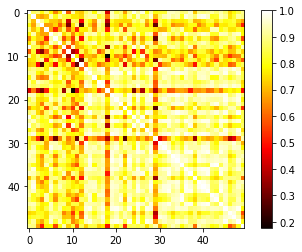

In [135]:
plt.imshow(Corr, cmap='hot')
plt.colorbar() 
plt.show()

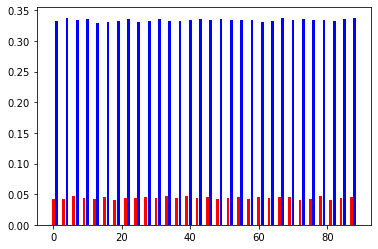

In [87]:
n_sample = 30
bias = np.abs(np.mean(errors, axis=1)[:n_sample])
std = np.std(errors, axis=1)[:n_sample]

x_val = []
y_val = []
col_val = []

for i in range(n_sample):
    x_val.append(i*3)
    x_val.append(i*3+1)
    y_val.append(bias[i])
    y_val.append(std[i])
    col_val.append('r')
    col_val.append('b')
    
plt.bar(x_val, y_val, color=col_val)
plt.show()

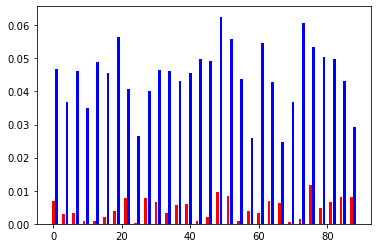

In [53]:
n_sample = 30
bias = np.abs(np.mean(errors, axis=1)[:n_sample])
std = np.std(errors, axis=1)[:n_sample]

x_val = []
y_val = []
col_val = []

for i in range(n_sample):
    x_val.append(i*3)
    x_val.append(i*3+1)
    y_val.append(bias[i])
    y_val.append(std[i])
    col_val.append('r')
    col_val.append('b')
    
plt.bar(x_val, y_val, color=col_val)
plt.show()

In [88]:
test_x[0], test_y[0], errors[0][0]

(array([-0.52130095,  0.14460828]), -0.07538443417869954, -0.25091970510517414)

In [27]:
def show_digit(image):
    img = Image.fromarray(np.uint8(image), 'L')
    img.show()